# Estadisticas Descriptiva

Es la rama de la estadistica encargada de la exploración de los datos de la cual se obtiene información relevante que ayuda a comprender el comportamiento de los mismos, a diferencia de la estadistica inferencial ya que esta se asocia a hacer inferencias o predecir el futuro. Aspectos importantes:
- Resumir grandes volumenes de información.
- Tomar mejores decisiones
- Responder preguntas con relevancia social
- Reconocer patrones en los datos

### Flujo de trabajo en Ciencia de Datos

**Inicial** Manejo dado por el ingeniero de datos
1. Ingesta de datos
2. Visualziación
3. Preparación

**Intermedio** Participa el analista de datos, cientifico de datos
1. Entrenamiento del modelo
2. Evaluación del modelo
3. Validación del modelo

**Final** Participa el ML Engineer, cientifico investigador y desarrollador
1. Modelo de producción
2. Usuario final

## Preprocesamiento

Identificar los tipos de datos, el pipeline de procesamiento que es lo mismo que es el flujo de procesamiento, es decir cuales son las transformaciones secuenciales que se le deben realizar a los datos para que los datos queden listos para ingresar al modelo.

## Preparación y Entrenamiento Modelo

Realizar un analisis descriptivo de los datos, es indispensable encontrar información como si existe correlación entre los datos y si dichos datos se pueden reducir.

## Evaluación del modelo y Producción

Probabilidad e inferencia, Realizar test de hipotesis

**Estadisticos para ingesta y procesamiento**

**Estadisticos para analitica y exploración**

## Tipos de Datos.
- Categoricos: ordinal, nominal pueden ser *object* y *bool*
- Numericos: discretos y continuos puede ser *int64* *float64*

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cars.csv')

**Conocer el tipo de datos** Accediendo al atributo del dataframe el cual nos retorna el tipo de datos de todas sus columnas o llaves.

In [4]:
df.dtypes

manufacturer_name     object
model_name            object
transmission          object
color                 object
odometer_value         int64
year_produced          int64
engine_fuel           object
engine_has_gas          bool
engine_type           object
engine_capacity      float64
body_type             object
has_warranty            bool
state                 object
drivetrain            object
price_usd            float64
is_exchangeable         bool
location_region       object
number_of_photos       int64
up_counter             int64
feature_0               bool
feature_1               bool
feature_2               bool
feature_3               bool
feature_4               bool
feature_5               bool
feature_6               bool
feature_7               bool
feature_8               bool
feature_9               bool
duration_listed        int64
dtype: object

**Conocer estadisticos de columnas numericas**

In [5]:
df.describe()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
count,38531.000000,38531.000000,38521.000000,38531.000000,38531.000000,38531.000000,38531.000000
mean,248864.638447,2002.943734,2.055161,6639.971021,9.649062,16.306091,80.577249
std,136072.376530,8.065731,0.671178,6428.152018,6.093217,43.286933,112.826569
min,0.000000,1942.000000,0.200000,1.000000,1.000000,1.000000,0.000000
25%,158000.000000,1998.000000,1.600000,2100.000000,5.000000,2.000000,23.000000
50%,250000.000000,2003.000000,2.000000,4800.000000,8.000000,5.000000,59.000000
75%,325000.000000,2009.000000,2.300000,8990.000000,12.000000,16.000000,91.000000
max,1000000.000000,2019.000000,8.000000,50000.000000,86.000000,1861.000000,2232.000000


## Medidas de tendencia Central

Es una forma de reducir información, algunas medidas son mejores que otras para dar información relevante de los datos.
- media: Es suceptible a valores atipicos
- mediana
- moda: La moda no aplica para valores numericos continuos

se puede identificar ciertos datos gracias a los *diagramas de frecuencias* o *tabla de frecuencias*

### Metafora de Bill Gates en un bar


In [7]:
df.price_usd.mean(), df.price_usd.median()

(6639.971021255613, 4800.0)

<AxesSubplot:ylabel='Frequency'>

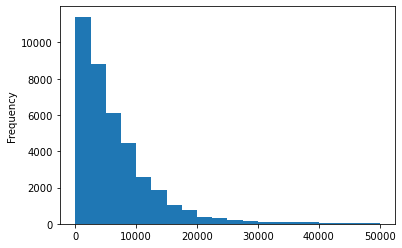

In [10]:
df.price_usd.plot.hist(bins=20)

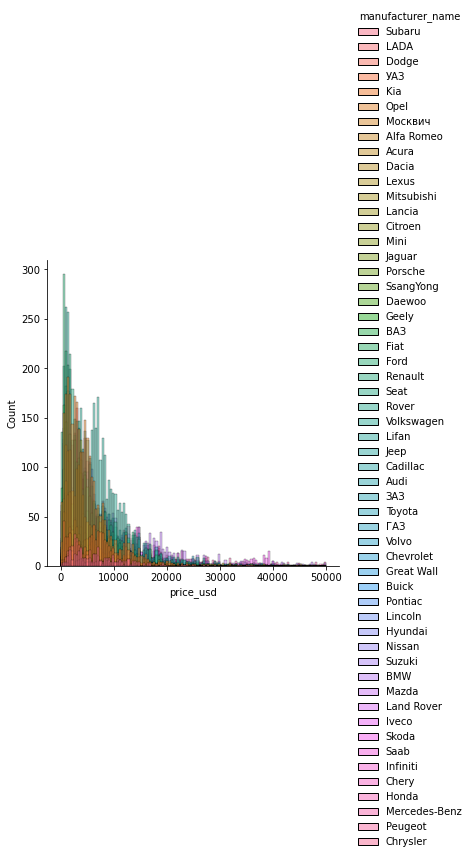

In [13]:
sns.displot(df,x='price_usd', hue='manufacturer_name')

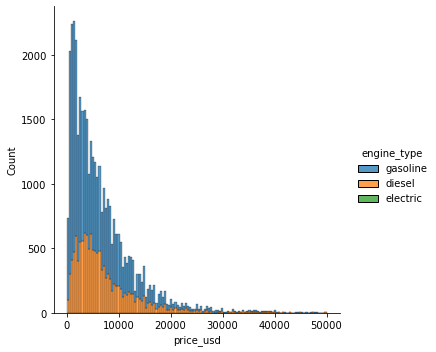

In [19]:
sns.displot(df,x='price_usd', hue='engine_type',multiple='stack')
plt.show()

In [3]:
df.groupby('engine_type').count()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_capacity,body_type,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
engine_type,,,,,,,,,,,,,,,,,,,,,
diesel,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,...,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874
electric,10,10,10,10,10,10,10,10,0,10,...,10,10,10,10,10,10,10,10,10,10
gasoline,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,...,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647


In [4]:
Q7_df = df[(df['manufacturer_name'] == 'Audi')& (df['model_name'] == 'Q7')]

<AxesSubplot:xlabel='price_usd', ylabel='Count'>

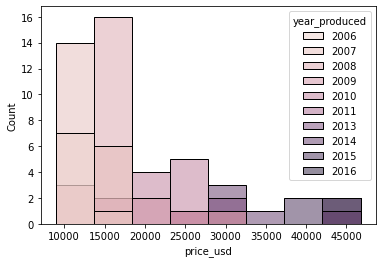

In [5]:
sns.histplot(Q7_df,x='price_usd',hue='year_produced')

## Medidas de Dispersión

**Rango**: Es el intervalo entre el valor maximo y el valor minimo, la distancia entre los dos.

**Rango intercuartilico**: Definir el conjunto de datos en cuatro divisiones homogeneas. Sacar las cuarta parte de los datos.

- Q1: la mitad entre el minimo y la mediana Agrupa el 25% de los datos
- Q2: Es la mediana, parte el conjunto en el 50% de los datos.Acumula el 50% de los datos
- Q3: La mitad entre el maximo y la mediana. Acumula el 75% de los datos

**IQR** Es el rango intercuiartilico, es la distancia entre el cuartil 1 y el cuartil 3

**Desviación Estandar Poblacional** Se saca a través del calculo de la varianza

$$
sigma= \sqrt{ \frac{1}{n}  \sum_{i=1}^{n} (x_i-m)^2}
$$


**Desviación Estandar Muestral** Utiliza un factor de corrección

$$
s= \sqrt{ \frac{1}{n-1}  \sum_{i=1}^{n} (x_i-m)^2}
$$


**Ajustar Maximos y Minimos** El rango se ajusta para poder excluir los outliers o valores atipicos.
¿Cómo?

SUMARLE AL PROMEDIO 3 VECES LA DESVIACIÓN ESTANDAR Y RESTARLE 3 VECES LA DESVIACIÓN ESTANDAR, TODOS LOS DATOS QUE ESTEN AFUERA DE ESTE INTERVALO SON CONSIDERADOS OUTLIERS EN UN TIPO DE DISTRIBUCIÓN NORMAL.

**Rango intercuartilico** Se mapean los datos anomalos sumando y restando 1.5 veces el rango intercuartilico. y las barreras se ajustan para identificar los datos que estan por fuera y son anomalos.

\* Cuando la distribución nos es normal, el rango intercuartilico para sumarlo y restarlo a los Q3 y Q1 se calcula bajo una formula o función. no se resta directamente.


In [6]:
df['price_usd'].std()

6428.1520182029035

In [3]:
rango = df['price_usd'].max() - df['price_usd'].min()

In [4]:
median = df['price_usd'].median()
Q1 = df['price_usd'].quantile(q=0.25)
Q3 = df['price_usd'].quantile(q=0.75)
min_val = df['price_usd'].quantile(q=0)
max_val = df['price_usd'].quantile(q=1)

print(min_val,Q1,median,Q3,max_val)


1.0 2100.0 4800.0 8990.0 50000.0


In [5]:
iqr = Q3 - Q1
iqr

6890.0

In [6]:
# Limites para outliers para distribución SIMETRICA
min_limit = Q1 - 1.5*iqr
max_limit = Q3 + 1.5*iqr
print(min_limit,max_limit)

-8235.0 19325.0


<AxesSubplot:xlabel='price_usd', ylabel='Count'>

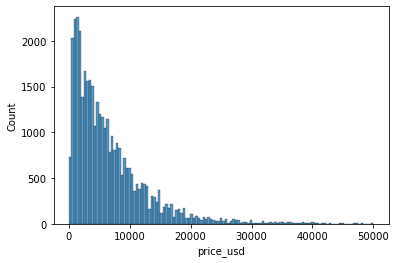

In [11]:
sns.histplot(df['price_usd'])

C:\Users\GAMER\anaconda3\envs\dataAnalyst\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_usd'>

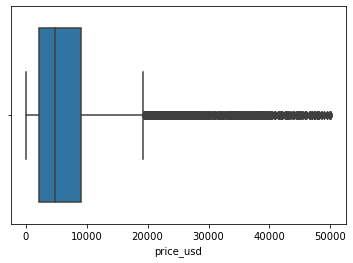

In [12]:
sns.boxplot(df['price_usd'])

<AxesSubplot:xlabel='engine_fuel', ylabel='price_usd'>

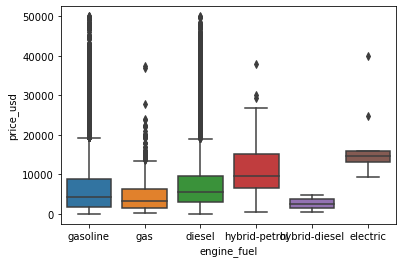

In [13]:
sns.boxplot(x= 'engine_fuel', y = 'price_usd', data= df)

#### Asimetría en distribuciones
Como vimos en la clase, el hecho de que nuestra distribución tenga una tendencia a la derecha o a izquierda nos representa un problema, ya que no a acorde con una distribución y eso puede afectar a nuestros análisis si no tomamos en cuenta ese sesgo. No siempre hay que confiar en nuestra intuición o lo que vemos a simple vista, hay métodos como:

- Primer coeficiente de asimetría de Pearson (asimetría de modo)
- Segundo coeficiente de asimetría de Pearson (asimetría mediana)
- Coeficiente de Groeneveld y Meeden
- Coeficiente de Fisher
- Por mencionar algunos.

**Y por último, no hay que olvidar la curtosis:**
Una curtosis grande implica una mayor concentración de valores de la variable tanto muy cerca de la media de la distribución (pico) como muy lejos de ella (colas), al tiempo que existe una relativamente menor frecuencia de valores intermedios. Esto explica una forma de la distribución de frecuencias/probabilidad con colas más gruesas, con un centro más apuntado y una menor proporción de valores intermedios entre el pico y colas.
Una mayor curtosis no implica una mayor varianza, ni viceversa.

## Exploración Visual de Datos.

In [7]:
# Diagramas de dispersión
iris = sns.load_dataset('iris')

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

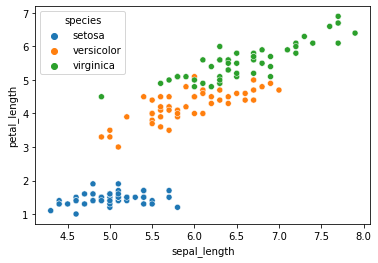

In [8]:
# http://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(data = iris, x='sepal_length',y= 'petal_length', hue='species')

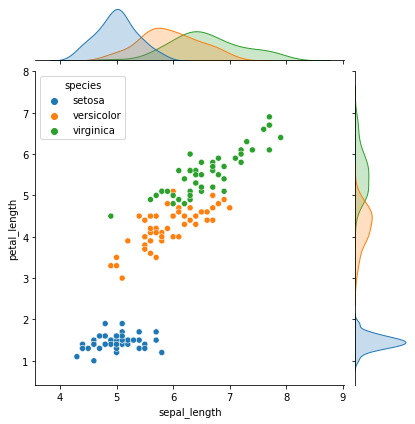

In [9]:
# join plot http://seaborn.pydata.org/generated/seaborn.jointplot.html
sns.jointplot(data=iris,x='sepal_length',y='petal_length',hue='species')


<AxesSubplot:xlabel='species', ylabel='sepal_length'>

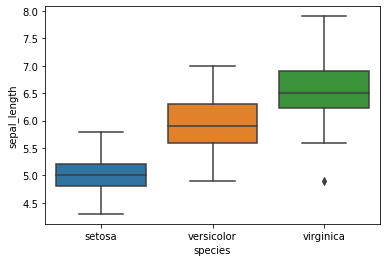

In [10]:
# http://seaborn.pydata.org/generated/seaborn.boxplot.html
sns.boxplot(x='species',y='sepal_length',data=iris)

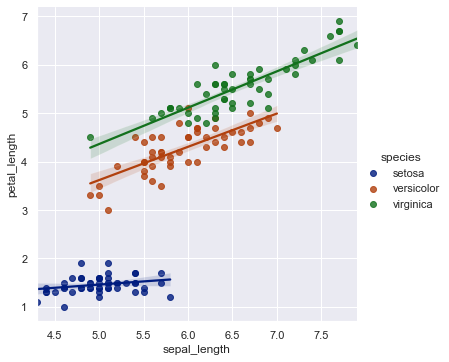

In [11]:
sns.set_theme()
sns.lmplot(data=iris,x='sepal_length',y='petal_length',hue='species', palette='dark')

## Pipeline para Variables Numericas.

### **Escalamiento lineal** 
Es importante estandarizar o escalar los datos antes de pasarlos por un modelo machine learning, por las siguientes razones.
- Los modelos machine learning estan optimizados para datos que se encuentran en un intervalo de [-1,1] Esto garantiza que haya una probabilidad mas alta de convergencia del modelo, ya que en algunos casos el no optimizar hace que no llegue tan rapido a ella e incluso que no la alcance, *los escalamientos lineales se usa cuando los datos tienen una distribución simetrica o estan uniformemente distribuidos*. 
- Hay diferentes tipos de escalamiento y se aplican dependiendo de la distribución de los datos
- Hay diferentes tipos de escalamiento; max-min,Clipping,Z-score,Winsorizing

### Escalamiento min-max
Un tipo de escalamiento lineal para datos con una distribución simetrica
$$
X_s = \frac{2x-min-max}{max-min}
$$

*No es recomendable colapsar los datos outliers de tu modelo de machine learning, a menos que en tu estudio estos outliers presenten un alto puntaje de apalancamiento*

### Escalamiento Z-Score
Centralizar y escalar, es probable que algunos datos sigan estando por fuera o sigan siendo outliers en la distribución pero es probable que ya no sean tan extremas. Mantinene la misma distribución gaussiana

$$
X_s = \frac{x-m}{sigma}
$$


### Escalamiento No Lineal
Si la distribución es muy sesgada, existe un metodo el cual se conoce como aplicar a un problema que desconozco una solución que conozco es decir, a los valores distribuidos de forma no simetrica le aplico una transformación para dejarlos distribuidos de forma simetrica, despues se aplican los escalamientos lineales.

- Datos fuertemente sesgados, no simetricos.
- tipos de transformación Logaritmos, Sigmoides,Polinomiales,etc
- se utilizan antes de escalamientos lineales.

**Tangente Hiperbolica**: 
Tiene un rango entre [-1,1], castiga fuertemente a los datos outliers, mas lalejados del cumulo de datos, ya que el resultado presentan rangos cada vez mas pequeños entre si. evita que se alejen tanto de su media. Hacen una distribución mas homogenea.
$$
    X_s = tanh(x)
$$

Puede tener variaciones para que su transformación sea mas abrupta o menos si el valor x se divide en un valor.
$$
    X_s = tanh(\frac{x}{a})
$$

**Raiz**: 

Similar a la anterior solo que no resulta valores negativos.
$$
    X_s = \sqrt{x}
$$

**Sigmoide o logistica**
$$
    X_s = \frac{1}{1+exp(-x)}
$$

In [12]:
import timeit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets,linear_model

X,y = datasets.load_diabetes(return_X_y=True)
raw = X[:,None,2]

In [13]:
# Regla de escalamiento
max_raw = max(raw)
min_raw = min(raw)
scaled = (2*raw - max_raw - min_raw) / (max_raw-min_raw)

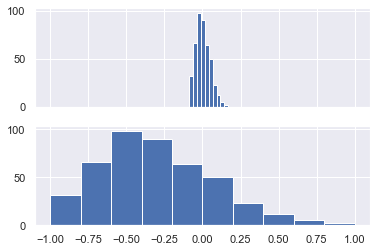

In [15]:
# Fig que comparte el Eje x entre graficos
fig,axs = plt.subplots(2,1,sharex=True)
axs[0].hist(raw)
axs[1].hist(scaled)
plt.show()

In [16]:
def train_raw():
    linear_model.LinearRegression().fit(raw,y)
    
def train_scaled():
    linear_model.LinearRegression().fit(scaled,y)
    
raw_time = timeit.timeit(train_raw, number = 100)
scaled_time = timeit.timeit(train_scaled,number=100)
print('train Raw: {}'.format(raw_time))
print('train Scaled: {}'.format(scaled_time))

train Raw: 0.07692569999994703
train Scaled: 0.030616899999927227


- **max-min scaled** Se recomienda el escalamiento de los datos cuando estan uniformemente distribuidos
- **Z-score** Se recomienda para datos que presentan una distribución normal

<AxesSubplot:>

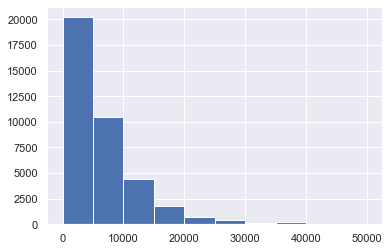

In [18]:
df.price_usd.hist()

### Transformación con una Tanh()

<AxesSubplot:>

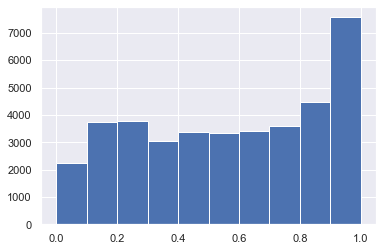

In [23]:
a = 7000
df.price_usd.apply(lambda x: np.tanh(x/a)).hist()

#### Consideraciones
- Si tus datos contienen demasiados outliers o valores atipicos, una estandarización usado la media y desviación estandar no sería adecuada probablemente. Para esto se recomienda un escalamiento mas robusto.

- Algunas veces un modelo se puede ver afectado por la correlación y puede tener presumciones sobre la independencia lineal, se recomienda utilizar un PCA con whiten = True para corregir esa correlación entre las variables.
- Los datos con una distribución sesgada se le aplica una transformación que permite una distribución mas homogenea, una vez la distribución es simetrica se le puede aplicar una transformación lineal. 
- La tangente hiperbolica entre mas grande sea el valor de la división en su parametro, se aplica una transformación menos fuerte, una agrupación no tan marcada, si es muy bajo el parametro divisor, la transformación y agrupación de los datos será muy marcada.

## Procesamiento de Variables Categoricas.
#### Dummy
- Representación Compacta.
- Mejor para inputs linealmente independientes. Es decir que estas variables no tienen un grado de dependencia significativo, permite un grado de correlación.
- La explicación de una variable Dummy no existe dentro de las librerias actuales de python, Dummy en esas librerias la tratan como un one-hot
#### One-hot
- Permite describir categorias no incluidas inicialmente. Es decir si hay categorias no contempladas el las puede representar como un vector nulo, lleno de ceros.


Categorias No Ordinal, en este caso no existe un orden o una jerarquia entre las categorias, en estos casos sirve una representación mas sencilla para evitar que el algoritmo trate de interpretar o interpolar a categorias numericas, por tanto, intentaría identificar valores intermedios entre las diferentes categorias de las variables.

**¿Tratar Variables Categoricas en Numericas?**

In [25]:
# Lo entendemos mejor como un one hot
pd.get_dummies(df['engine_type'])

,diesel,electric,gasoline
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
38526,0,0,1
38527,1,0,0
38528,0,0,1
38529,0,0,1


In [33]:
import sklearn.preprocessing as preprocessing
encoder = preprocessing.OneHotEncoder(handle_unknown='ignore')
# En vez de hacer un reshape, se convierte en una matriz y
# no se deja como una serie
encoder.fit(df[['engine_type']].values)

OneHotEncoder(handle_unknown='ignore')

In [36]:
encoder.transform([['gasoline'],['diesel'],['aceite']])

<3x3 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [37]:
encoder.fit(df[['year_produced']].values)
encoder.transform([[2016],[2009],[1990]])

<3x64 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

**Anotaciones finales**
- Una vez se hace la transformación de las variables categoricas a numericas, es necesario analizar la correlación entre ellas.

## Correlaciones
- Representa un comportamiento similar entre variables, o un patron de comportamiento entre ellas.
- Si existen variables con un comportamiento similar o correlación alta, es posible que no tenga sentido incluir ambas variables en el modelo, por ambas variables pueden aportar lo mismo al modelo.
- Variables Categoricas a numericas, tambien se debe analizar la correlación entre ellas ya que esta transformación expande el espacio en cantidad de variables.
- La correlación no indica una causa o efecto entre dos variables.


**Covarianza**

Punto de partida para analisis de correlación, solamente que este valor no esta estandarizado, puede que las variables tengan un orden de magnitud muy diferente y este valor resultante no exprese nada, por tanto, se debe dividir por la desviación estandar para estandarizar los datos.
$$
cov = \frac{1}{n-1}\sum_{i=1}^n(x_i-x)(y_i-y)
$$


Coeficiente de correlación:
$$
p = \frac{cov}{std(x)std(y)}
$$


### Matriz de Covarianza

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

iris = sns.load_dataset('iris')

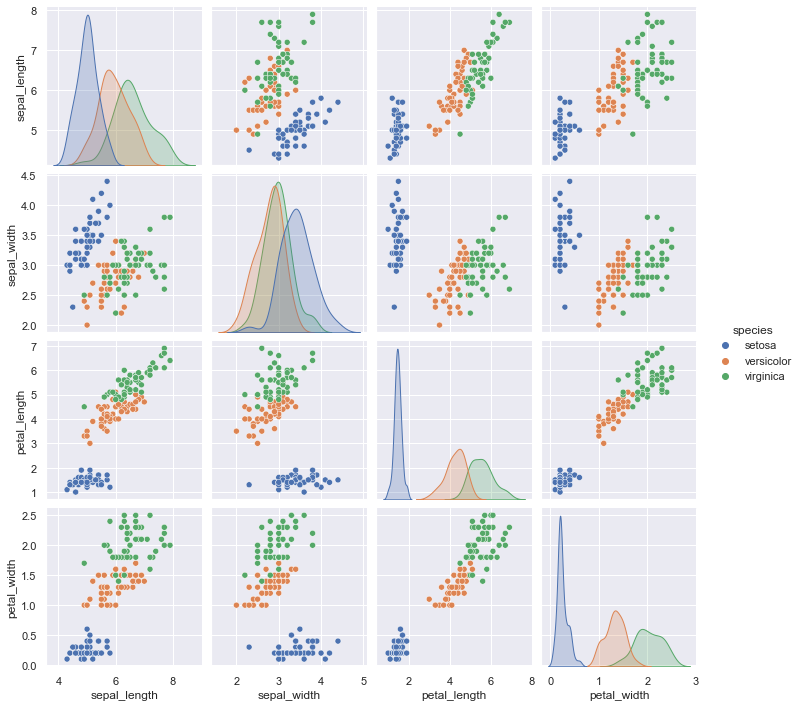

In [41]:
sns.pairplot(iris, hue='species')

<AxesSubplot:>

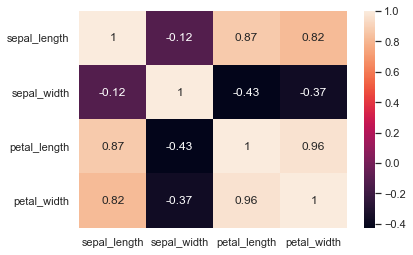

In [40]:
sns.heatmap(iris.corr(),annot=True)

In [43]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [45]:
scaler = StandardScaler()
scaled = scaler.fit_transform(
    iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
)
# Traspuesta de los datos escalados
scaled.T

array([[-9.00681170e-01, -1.14301691e+00, -1.38535265e+00,
        -1.50652052e+00, -1.02184904e+00, -5.37177559e-01,
        -1.50652052e+00, -1.02184904e+00, -1.74885626e+00,
        -1.14301691e+00, -5.37177559e-01, -1.26418478e+00,
        -1.26418478e+00, -1.87002413e+00, -5.25060772e-02,
        -1.73673948e-01, -5.37177559e-01, -9.00681170e-01,
        -1.73673948e-01, -9.00681170e-01, -5.37177559e-01,
        -9.00681170e-01, -1.50652052e+00, -9.00681170e-01,
        -1.26418478e+00, -1.02184904e+00, -1.02184904e+00,
        -7.79513300e-01, -7.79513300e-01, -1.38535265e+00,
        -1.26418478e+00, -5.37177559e-01, -7.79513300e-01,
        -4.16009689e-01, -1.14301691e+00, -1.02184904e+00,
        -4.16009689e-01, -1.14301691e+00, -1.74885626e+00,
        -9.00681170e-01, -1.02184904e+00, -1.62768839e+00,
        -1.74885626e+00, -1.02184904e+00, -9.00681170e-01,
        -1.26418478e+00, -9.00681170e-01, -1.50652052e+00,
        -6.58345429e-01, -1.02184904e+00,  1.40150837e+0

In [46]:
covariance_matrix = np.cov(scaled.T)
covariance_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

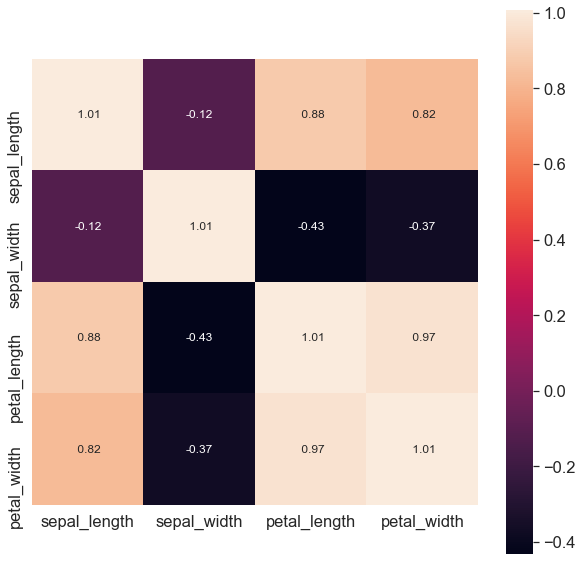

In [47]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(covariance_matrix,
                cbar=True,
                annot=True,
                square=True,
                fmt=' .2f',
                annot_kws={'size':12},
                yticklabels=['sepal_length','sepal_width','petal_length','petal_width'],
                xticklabels=['sepal_length','sepal_width','petal_length','petal_width']
                )

## Valores propios de una matriz
La matriz de covarianza nos permite identificar que variables se encuentran altamente correlacionadas y por tanto, identificar si dichas variables aportan la misma información al modelo, una tecnica para reducir esas dimensiones es el PCA o analisis de componentes principales.

El PCA esta basado en el concepto del algebra de vectores y matrices, mas especificamente basado en el calculo de los valores propios de una matriz.


**Repaso Basico de Matriz**
- La sumas y restas entre matirces solamente se pueden realizar con matrices cuadradas, es decir que ambas matrices tienen igual numero de filas y columnas
- La multiplicación de matrices se ejecuta como la suma de los productos entre los elementos de la fila de la matriz 1 y la columna de la matriz 2. así se constituye el elemento uno de la matriz resultante.
- El inverso de una matriz es tal numero que al multiplicar por la misma matriz su resultado da 1 y su notación es así, no todas las matrices tienen una inversa.
- La multiplicación solamente se puede llevar a cabo entre dos matrices que tengan: igual numero de columnas en la matriz numero uno que filas en la matriz numero dos. Esto porque el producto se aplica secuencialmente en las columnas de la matriz uno multiplicando los elementos uno por uno a los elementos en las filas de la matriz dos.

$$
A*A^{-1}
$$


In [50]:
A = np.array([[2,3,4],[1,2,3],[5,4,3]])
B = np.array([[1,8,7],[9,4,7],[6,2,9]])
# Multiplicación
np.matmul(A,B)

array([[53, 36, 71],
       [37, 22, 48],
       [59, 62, 90]])

In [52]:
A_inver = np.linalg.inv(A)
A_inver

array([[ 7.50599938e+15, -8.75699928e+15, -1.25099990e+15],
       [-1.50119988e+16,  1.75139986e+16,  2.50199979e+15],
       [ 7.50599938e+15, -8.75699928e+15, -1.25099990e+15]])

In [55]:
np.matmul(A,A_inver)

array([[ 0.  ,  0.  , -1.  ],
       [ 0.  ,  0.  , -0.25],
       [ 4.  ,  0.  ,  0.75]])

### Vector y valor propio.
Cuando en la ecuación que se muestra a continuación se tiene una matriz A y un vector x, se puede hablar de que hay vectores donde es equivalente multiplicarlos por un numero en especifico y/o multiplicarlos por una matriz. A esto se le conoce como vector propio de una matriz y un valor propio correspondiente.

In [1]:
import numpy as np
A = np.array([[1, 2], [1, 0]])
values, vectors = np.linalg.eig(A)

In [3]:
values,vectors

(array([ 2., -1.]),
 array([[ 0.89442719, -0.70710678],
        [ 0.4472136 ,  0.70710678]]))

In [6]:
vectors.T

array([[ 0.89442719,  0.4472136 ],
       [-0.70710678,  0.70710678]])

**Ejemplo** En este ejemplo se aprecia el concepto mejor, si tenemos un vector propio de la matriz A, al multiplicarse los dos, se encuentra que el producto entre estos dos valores es equivalente a una multiplicación del vector por un numero.

- El vector propio de la matriz A.
- El valor propio de este vector esta dado tambien por la función de numpy, values, este valor es -1.
- Es importante trasponer estos vectores porque numpy los da como vector columna.

In [7]:
np.matmul(A,vectors.T[1])

array([ 0.70710678, -0.70710678])

In [8]:
np.matmul(A,vectors.T[0])

array([1.78885438, 0.89442719])

El valor propio como se aprecia anterior mente es 2, para que se obtienen estos valores y vectores propios?:
- Se consiguen para poder diagonalizar la matriz. Pero se debe definir si una matriz es diagonalizable si se puede definir así
$$
A = P*D*P^{-1}
$$
- La matriz D representa en su diagonal los valores propios de la matriz diagonalizable, y en la matriz P se colocan en cada columna los vectores propios de la misma.

**¿Que pasa si lo aplicamos este calculo a la matriz de covarianza?**

- Los vectores representan las direcciones a lo largo de las cuales se percibe la mayor cantidad de varianza de ese conjunto de datos. Donde la cantidad de varianza es proporcional al valor propio de cada vector propio.
- Los vectores propios siempre son independientes entre si, porque representan direcciones diferentes lo cual implica que los vectores representan nuevas variables con correlación baja posible y mas representativa posible.
- Los vectores propios de una matriz de covarianza son ortogonales, esto quiere decir que el producto punto interno entre cualquier par de vectores siempre da cero, A esto se le denomina matriz ortogonal.
- La inversa de una matriz ortogonal es igual a la transpuesta.

## Analisis de Componentes Principales
Reducir el numero de variables a las variables representativas del conjunto de datos.
#### Proyección de un vector o sombra de un vector.
¿Cómo se refleja un vector en un angulo superior a otro, sobre el vector de abajo, es decir, cual es la parte del vector que se encuentra proyectada dentro del otro vector ubicado en la parte inferior.

Proyectar un vector, o el concepto como tal, se aplica en la covarianza cuando intentamos describir como se comporta la varianza en cierta dirección dentro de un conjunto de datos.

**¿Cómo así que un vector que en su dirección capture la mayor varianza?**

Debemos ubicarnos en el plano donde se plasma el conjunto de datos, los datos tienen cierta dispersión entre ellos y tendencias, en si, los datos presentan sus distribuciones.

Estando allí se ubica una serie de vectores en donde el vector el cual sobre pase la proyección de los datos vectorizados, será el vector que apunta o se encamina a recoger la mayor varianza, todos los datos se pueden representar como un vector. 

- Los vectores propios son consideradas esas componentes que capturan la mayor varianza.

- El vector propio que sigue la linea o tendencia de los datos, es aquel que recoge la mayor varianza.

- ¿Como se calcula la covarianza de las proyecciones del vector propio sobre los puntos del conjunto de datos?. Así es, a cada componente se le calcula la covarianza según la proyección del vector propio sobre los puntos de datos.

- Ahora, no se obtiene una varianza asociada a los datos, NO. Se obtiene una varianza asociada a una dirección de movimiento que se esta tomando.

- La var(vector * el punto del data set, ...) así sucesivamente se llega a calcular la varianza. Es lo mismo que el producto del vector transpuesto por la matriz de covarianza. por el vector original.

- Coger la matriz de covarianza y multiplicarla por ese vector brinda la varianza en esa dirección. 

- La matriz de covarianza se le calcula los vectores y valores prpios.

- El PCA mejora su rendimiento, o absorve mejor y coherentemente mas varianza en sus componentes principales si los datos se encuentran estandarizados, bajo una misma escala, ya que esto permite centrar el proceso y evitar que las componentes NO absorvan la suficiente varianza.

En resumen, la varianza que explican los valores propios se puede calcular proporcional a la relación del valor propio particular dividido por la suma de todos los valores propios que estan en esa matriz. eso da el porcentaje de varianza explicada de cada vector propio.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

iris = sns.load_dataset('iris')

scaler = StandardScaler()
scaled = scaler.fit_transform(
    iris[['sepal_length','sepal_width','petal_length','petal_width']].values
    )

covariance_matrix = np.cov(scaled.T)
covariance_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

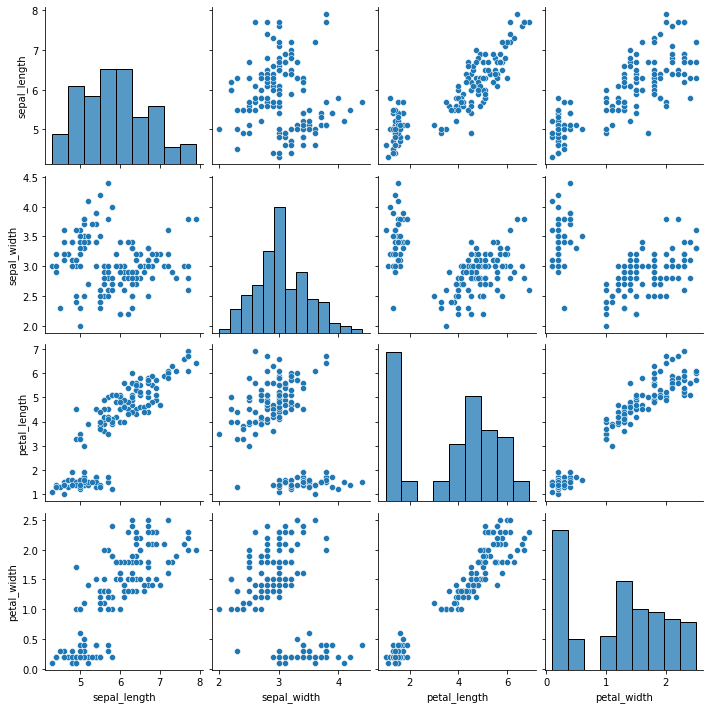

In [11]:
sns.pairplot(iris)

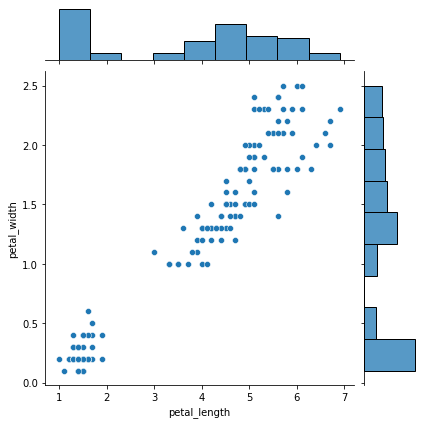

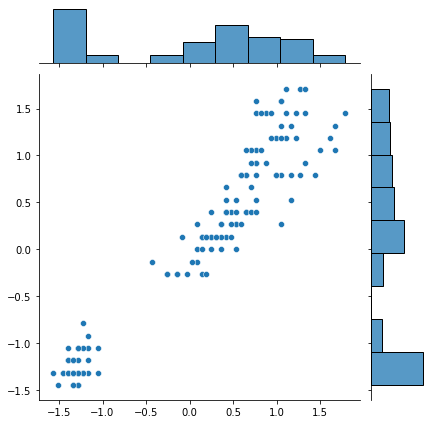

In [12]:
sns.jointplot(x=iris['petal_length'],y=iris['petal_width'])
sns.jointplot(x = scaled[:,2],y=scaled[:,3])

In [13]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
eigen_values

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [16]:
# Vectores propios que capturan la mayor cantidad de varianza
eigen_vectors.T

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [-0.37741762, -0.92329566, -0.02449161, -0.06694199],
       [-0.71956635,  0.24438178,  0.14212637,  0.63427274],
       [ 0.26128628, -0.12350962, -0.80144925,  0.52359713]])

In [17]:
# varianza explicada; Capturar la varianza que explican
variance_explained = []
for i in eigen_values:
    variance_explained.append((i/sum(eigen_values))*100)

print(variance_explained)

[72.96244541329987, 22.850761786701757, 3.6689218892828763, 0.5178709107154831]


## ¿Cómo coger esos datos que estan en esas cuatro componentes?

objetivo transformar esos datos para reducirlos datos.


In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(scaled)

PCA(n_components=2)

In [20]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

**Crear nuevas variables que salen de la convinación de las antiguas.**

Esas nuevas variables son menores en numero y esas son las que entran al modelo de machine learning.

In [25]:
reduce_scaled = pca.transform(scaled)

In [26]:
iris['pca_1'] = reduce_scaled[:, 0]
iris['pca_2'] = reduce_scaled[:, 1]

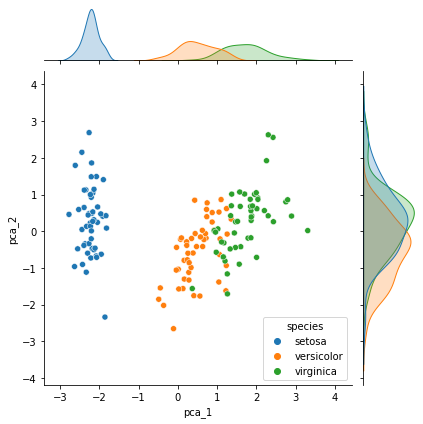

In [31]:
sns.jointplot(x=iris['pca_1'],y=iris['pca_2'],hue = iris['species'])